## Read and clean and check the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [241]:
names = [
    'dummy',
    'Problem',
    'Max depth',
    'Macros',
    'Solver',
    'Metric',
    'Dist type',
    'Name type',
    'Rep',
    'Elapsed',
    'Fitness (in-run)',
    'Fitness'
]
df = pd.read_csv("outputs/lc_results_7_problems_without_macros_2_problems_with_macros_2025-05-14.csv", names=names, skiprows=1)
df = df.drop("dummy", axis=1)

In [242]:
df.head()

,Problem,Max depth,Macros,Solver,Metric,Dist type,Name type,Rep,Elapsed,Fitness (in-run),Fitness
0,NOT,8,False,random_search,shd,fine,str,0,9.481220,0.000000,0.000000
1,NOT,8,False,random_search,discrete_metric,fine,str,0,9.973130,0.500000,0.166667
2,NOT,8,False,hill_climber,shd,fine,str,0,7.053841,0.027778,0.027778
3,NOT,8,False,hill_climber,discrete_metric,fine,str,0,8.847049,0.500000,0.027778
4,NOT,8,False,genetic_algorithm,shd,fine,str,0,84.358323,0.000000,0.000000


In [243]:
7 * 3 * 2 * 30 + 2 * 3 * 2 * 30 # 7 problems without macros, 2 problems with; 3 solvers; 2 metrics; 30 reps

1620

In [306]:
df.columns

Index(['Problem', 'Max depth', 'Macros', 'Solver', 'Metric', 'Dist type',
       'Name type', 'Rep', 'Elapsed', 'Fitness (in-run)', 'Fitness',
       'solver / metric'],
      dtype='object')

In [244]:
df.shape

(1620, 11)

In [245]:
df.describe()

,Max depth,Rep,Elapsed,Fitness (in-run),Fitness
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000
mean,10.000000,14.500000,589.025768,0.265414,0.054876
std,1.333745,8.658114,1065.928953,0.414652,0.155027
min,8.000000,0.000000,6.535685,0.000000,0.000000
25%,10.000000,7.000000,106.565794,0.000000,0.000000
50%,10.000000,14.500000,224.757643,0.000000,0.000000
75%,10.000000,22.000000,583.658338,0.500000,0.027778
max,12.000000,29.000000,12895.260529,1.000000,1.000000


In [ ]:
solver_mapper = {
    'random_search': 'RS',
    'hill_climber': 'HC',
    'genetic_algorithm': 'GA'
}
metric_mapper = {
    'shd': 'fine',
    'discrete_metric': 'coarse'
}
df['Solver'] = df['Solver'].replace(solver_mapper)
df['Metric'] = df['Metric'].replace(metric_mapper)

In [254]:
for col in ['Problem', 'Macros', 'Metric', 'Solver']:
    print(f'{col}: {set(df[col].values)}')

Problem: {'NOT', 'AND', 'PLUS', 'ALL', 'FOLD', 'SUCC', 'IS_ZERO'}
Macros: {False, True}
Metric: {'coarse', 'fine'}
Solver: {'HC', 'RS', 'GA'}


In [ ]:
# we might not use this, it gets ugly
df['solver / metric'] = df['Solver'] + " / " + df['Metric']


In [257]:
for col in ['Problem', 'Macros', 'Metric', 'Solver', 'solver / metric']:
    print(f'{col}: {set(df[col].values)}')

Problem: {'NOT', 'AND', 'PLUS', 'ALL', 'FOLD', 'SUCC', 'IS_ZERO'}
Macros: {False, True}
Metric: {'coarse', 'fine'}
Solver: {'HC', 'RS', 'GA'}
solver / metric: {'GA / fine', 'HC / coarse', 'HC / fine', 'GA / coarse', 'RS / coarse', 'RS / fine'}


## Describe results: have any runs succeeded on each problem?

In [ ]:
for problem in set(df["Problem"].values):
    df_subset = df[df["Problem"] == problem]
    for b in set(df_subset["Macros"].values):
        s = df_subset["Fitness"]
        print(f'{problem} Fitness with macros {"enabled" if b else "disabled"}: {s.describe()}')
        s = df_subset["Test fitness"]
        print(f'{problem} Test fitness with macros {"enabled" if b else "disabled"}: {s.describe()}')

NOT with macros disabled: count    180.000000
mean       0.010494
std        0.030956
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.166667
Name: Fitness, dtype: float64
AND with macros disabled: count    180.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fitness, dtype: float64
PLUS with macros disabled: count    180.000000
mean       0.006099
std        0.000499
min        0.000000
25%        0.006173
50%        0.006173
75%        0.006173
max        0.006173
Name: Fitness, dtype: float64
ALL with macros disabled: count    360.000000
mean       0.151067
std        0.230934
min        0.000000
25%        0.009259
50%        0.106481
75%        0.111111
max        1.000000
Name: Fitness, dtype: float64
ALL with macros enabled: count    360.000000
mean       0.151067
std        0.230934
min        0.000000
25%        0.009259
50%        0.106481
75%        0.111111
max       

In [338]:
df.columns

Index(['Problem', 'Max depth', 'Macros', 'Solver', 'Metric', 'Dist type',
       'Name type', 'Rep', 'Elapsed', 'Fitness (in-run)', 'Fitness',
       'solver / metric'],
      dtype='object')

In [339]:
help(df.apply)

Help on method apply in module pandas.core.frame:

apply(func: 'AggFuncType', axis: 'Axis' = 0, raw: 'bool' = False, result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None, args=(), by_row: "Literal[False, 'compat']" = 'compat', engine: "Literal['python', 'numba']" = 'python', engine_kwargs: 'dict[str, bool] | None' = None, **kwargs) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
 

In [343]:

def merge_problem_macros_columns(df):
    df["Problem_Macros"] = df.apply(lambda row: row["Problem"] + ("-M" if row["Macros"] else ""), axis=1)
    return df
df = merge_problem_macros_columns(df)

In [352]:


def aggregate_experiment_results(df):
    # Exclude specific columns from grouping
    exclude_columns = ['Fitness', 'Test fitness', 'Elapsed', 'rep']
    
    # Identify configuration columns
    config_columns = [col for col in df.columns if col not in exclude_columns]
    
    # Aggregate with specified calculations
    aggregated_df = df.groupby(config_columns)
    print(aggregated_df)
    
    aggregated_df = aggregated_df.agg(
        success_rate=pd.NamedAgg(column="Fitness", aggfunc=(lambda x: (x==0).mean())),
        mean_elapsed=pd.NamedAgg(column="Elapsed", aggfunc="min"),
    )
    #     {
    #     #'Fitness': ('success_rate', lambda x: (x == 0).mean()),
    #     #'Test fitness': ('test_success_rate', lambda x: (x == 0).mean()),
    #     'mean_elapsed_time': ('Elapsed', 'mean')
    # }).reset_index()
    
    return aggregated_df

def create_fitness_pivot(aggregated_df):
    """
    Create a pivot table of mean fitness values across Solver, Metric, and Name type.
    
    Parameters:
    -----------
    aggregated_df : pandas.DataFrame
        Aggregated DataFrame from previous aggregation step
    
    Returns:
    --------
    pivot_table : pandas.DataFrame
        Pivot table with mean fitness values
    """
    # Create pivot table
    pivot_table = pd.pivot_table(aggregated_df, 
                                 values='success_rate',  # Use the pre-calculated success rate
                                 index='Problem_Macros',    # Rows will be different solvers
                                 columns=['Solver', 'Metric'])  # Columns will be combinations of Metric and Name type
    # , 'Name type'
    
    return pivot_table

def export_pivot_to_latex(pivot_table):
    """
    Export pivot table to LaTeX tabular format.
    
    Parameters:
    -----------
    pivot_table : pandas.DataFrame
        Pivot table to be exported
    
    Returns:
    --------
    latex_str : str
        LaTeX representation of the pivot table
    """
    # Generate LaTeX representation
    latex_str = pivot_table.to_latex(multicolumn=True, multicolumn_format='c', 
                                     escape=False, float_format="{:.2f}".format)
    
    return latex_str



In [353]:
# Example usage:
aggregated_df = aggregate_experiment_results(df)
aggregated_df.describe()


,success_rate,mean_elapsed
count,1620.000000,1620.000000
mean,0.540741,589.025768
std,0.498491,1065.928953
min,0.000000,6.535685
25%,0.000000,106.565794
50%,1.000000,224.757643
75%,1.000000,583.658338
max,1.000000,12895.260529


In [354]:
fitness_pivot = create_fitness_pivot(aggregated_df)
latex_table = export_pivot_to_latex(fitness_pivot)
print(latex_table)

\begin{tabular}{lrrrrrr}
\toprule
Solver & \multicolumn{2}{c}{GA} & \multicolumn{2}{c}{HC} & \multicolumn{2}{c}{RS} \\
Metric & coarse & fine & coarse & fine & coarse & fine \\
Problem_Macros &  &  &  &  &  &  \\
\midrule
ALL & 0.27 & 0.13 & 0.20 & 0.17 & 0.07 & 0.00 \\
ALL-M & 0.33 & 0.33 & 0.33 & 0.33 & 0.33 & 0.33 \\
AND & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
FOLD & 0.23 & 0.20 & 0.27 & 0.23 & 0.33 & 0.33 \\
IS_ZERO & 0.53 & 0.47 & 0.67 & 0.73 & 0.97 & 0.97 \\
IS_ZERO-M & 0.93 & 0.87 & 0.93 & 0.93 & 0.97 & 1.00 \\
NOT & 0.83 & 0.63 & 0.77 & 0.70 & 0.87 & 0.93 \\
PLUS & 0.00 & 0.00 & 0.00 & 0.03 & 0.00 & 0.00 \\
SUCC & 0.67 & 0.97 & 0.60 & 0.73 & 0.47 & 0.60 \\
\bottomrule
\end{tabular}



## Barplots showing success rate on all problems (no macros, then macros), broken by solver in-plot by metric between plot - fine metric, str names



In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, width_ratios=[7, 2], figsize=(6, 3))
sns.barplot(df[(df["Metric"] == "fine") & (df["Macros"] == False) & (df["Name type"] == 'str')], 
              x="Problem", hue="Solver", y="Fitness", ax=axs[0])
axs[0].set_xlabel("Problem (no macros)")
axs[0].legend(title='Solver\n(fine metric)')
sns.barplot(df[(df["Metric"] == "fine") & (df["Macros"] == True) & (df["Name type"] == 'str')], 
              x="Problem", hue="Solver", y="Fitness", ax=axs[1])
axs[1].set_xlabel("Problem (macros)")
axs[1].legend([],[], frameon=False)
plt.tight_layout()
plt.savefig(f"img/boxplot_fx_fine_metric_str_name.pdf")



In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, width_ratios=[7, 2], figsize=(6, 3))
sns.barplot(df[(df["Metric"] == "fine") & (df["Macros"] == False) & (df["Name type"] == 'lin')], 
              x="Problem", hue="Solver", y="Fitness", ax=axs[0])
axs[0].set_xlabel("Problem (no macros)")
axs[0].legend(title='Solver\n(fine metric)')
sns.barplot(df[(df["Metric"] == "fine") & (df["Macros"] == True) & (df["Name type"] == 'lin')], 
              x="Problem", hue="Solver", y="Fitness", ax=axs[1])
axs[1].set_xlabel("Problem (macros)")
axs[1].legend([],[], frameon=False)
plt.tight_layout()
plt.savefig(f"img/boxplot_fx_fine_metric_lin_name.pdf")

## Boxplots / stripplots showing all problems (no macros, then macros), broken by solver in-plot and broken down by metric between-plot

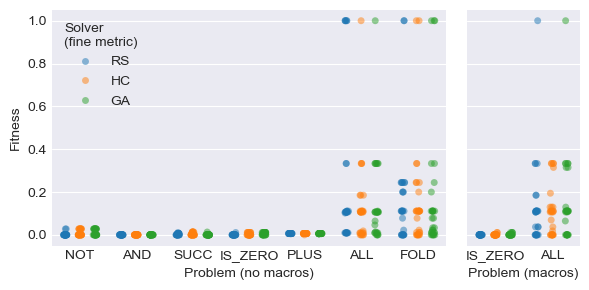

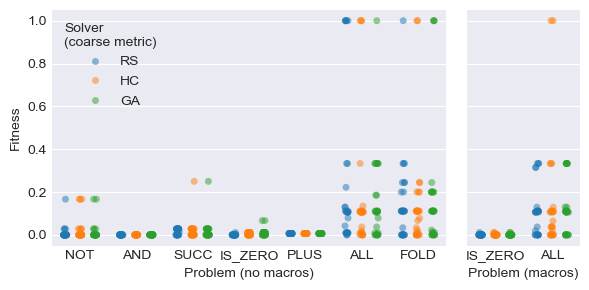

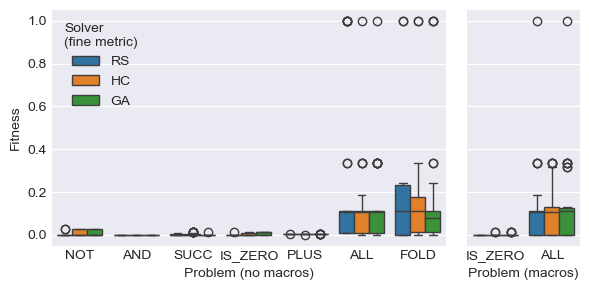

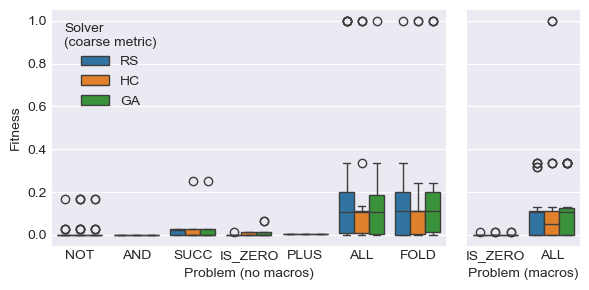

In [281]:
fix, axs = plt.subplots(1, 2, sharey=True, width_ratios=[7, 2], figsize=(6, 3))
sns.stripplot(df[(df["Metric"] == "fine") & (df["Macros"] == False)], 
              x="Problem", hue="Solver", y="Fitness", dodge=True, alpha=0.5, ax=axs[0])
axs[0].set_xlabel("Problem (no macros)")
axs[0].legend(title='Solver\n(fine metric)')
sns.stripplot(df[(df["Metric"] == "fine") & (df["Macros"] == True)], 
              x="Problem", hue="Solver", y="Fitness", dodge=True, alpha=0.5, ax=axs[1])
axs[1].set_xlabel("Problem (macros)")
axs[1].legend([],[], frameon=False)
plt.tight_layout()
plt.savefig(f"img/stripplot_fx_fine.pdf")

fix, axs = plt.subplots(1, 2, sharey=True, width_ratios=[7, 2], figsize=(6, 3))
sns.stripplot(df[(df["Metric"] == "coarse") & (df["Macros"] == False)], 
              x="Problem", hue="Solver", y="Fitness", dodge=True, alpha=0.5, ax=axs[0])
axs[0].set_xlabel("Problem (no macros)")
axs[0].legend(title='Solver\n(coarse metric)')
sns.stripplot(df[(df["Metric"] == "coarse") & (df["Macros"] == True)], 
              x="Problem", hue="Solver", y="Fitness", dodge=True, alpha=0.5, ax=axs[1])
axs[1].set_xlabel("Problem (macros)")
axs[1].legend([],[], frameon=False)
plt.tight_layout()
plt.savefig(f"img/stripplot_fx_coarse.pdf")

fix, axs = plt.subplots(1, 2, sharey=True, width_ratios=[7, 2], figsize=(6, 3))
sns.boxplot(df[(df["Metric"] == "fine") & (df["Macros"] == False)], 
              x="Problem", hue="Solver", y="Fitness", ax=axs[0])
axs[0].set_xlabel("Problem (no macros)")
axs[0].legend(title='Solver\n(fine metric)')
sns.boxplot(df[(df["Metric"] == "fine") & (df["Macros"] == True)], 
              x="Problem", hue="Solver", y="Fitness", ax=axs[1])
axs[1].set_xlabel("Problem (macros)")
axs[1].legend([],[], frameon=False)
plt.tight_layout()
plt.savefig(f"img/boxplot_fx_fine.pdf")

fix, axs = plt.subplots(1, 2, sharey=True, width_ratios=[7, 2], figsize=(6, 3))
sns.boxplot(df[(df["Metric"] == "coarse") & (df["Macros"] == False)], 
              x="Problem", hue="Solver", y="Fitness",  ax=axs[0])
axs[0].set_xlabel("Problem (no macros)")
axs[0].legend(title='Solver\n(coarse metric)')
sns.boxplot(df[(df["Metric"] == "coarse") & (df["Macros"] == True)], 
              x="Problem", hue="Solver", y="Fitness", ax=axs[1])
axs[1].set_xlabel("Problem (macros)")
axs[1].legend([],[], frameon=False)
plt.tight_layout()
plt.savefig(f"img/boxplot_fx_coarse.pdf")

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def parse_filename(filename):
    """Parse the filename to extract experiment parameters."""
    pattern = r'history_(\w+)_(\d+)_(True|False)_(genetic_algorithm|hill_climber|random_search)_(discrete_metric|shd)_.*_(str|lin)_(\d+)\.csv'
    match = re.match(pattern, filename)
    
    if match:
        problem, _, macros_enabled, solver, metric, name_type, repetition= match.groups()
        return {
            'problem': problem,
            'macros_enabled': macros_enabled == 'True',
            'solver': solver,
            'metric': metric,
            'name_type': name_type,
            'repetition': int(repetition)
        }
    return None

def load_csv_files(directory):
    """Load all CSV files into a nested dictionary structure."""
    results = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(dict))))
    
    for filename in os.listdir(directory):
        if not filename.endswith('.csv'):
            continue
            
        params = parse_filename(filename)
        if not params:
            print(f"Skipping file with unparseable name: {filename}")
            continue
            
        # Load the CSV into a DataFrame
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, names=['evaluations', 'fitness'])
        
        # Store in nested dictionary
        prob = params['problem']
        macro = params['macros_enabled']
        solver = params['solver']
        metric = params['metric']
        name_type = params['name_type']
        rep = params['repetition']
        
        results[prob][macro][solver][metric][name_type][rep] = df
        
    return results

In [120]:
# Example usage:
histories_dir = "outputs/histories/"
histories = load_csv_files(histories_dir)

# Access example:
# df = experiment_results['AND'][False]['random_search']['shd'][22]

In [123]:
histories
histories['AND'][False]['random_search']['shd'][22]

,evaluations,fitness
0,Unnamed: 0,fitness
1,172,0.0138888888888888
2,345,0.0138888888888888
3,518,0.0138888888888888
4,691,0.0138888888888888
...,...,...
169,29236,0.0
170,29409,0.0
171,29582,0.0
172,29755,0.0


In [125]:
def filter_and_plot(results, problem=None, macros_enabled=None, solver=None, metric=None, 
                   column='fitness', figsize=(12, 6), title=None, legend_loc='best', 
                   style='seaborn-v0_8-darkgrid'):
    """
    Plot specified column from DataFrames that match the given filters.
    
    Parameters:
    -----------
    results : nested dictionary
        The results dictionary from load_csv_files
    problem, macros_enabled, solver, metric : filter values
        If None, include all values for that parameter
    column : str
        Column name to plot (default: 'fitness')
    figsize, title, legend_loc, style : plot parameters
        Parameters for matplotlib plot configuration
    
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """
    # Set plot style
    plt.style.use(style)
    
    # Create plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Iterate through the nested dictionary based on filters
    for p in results.keys():
        if problem is not None and p != problem:
            continue
            
        for m in results[p].keys():
            if macros_enabled is not None and m != macros_enabled:
                continue
                
            for s in results[p][m].keys():
                if solver is not None and s != solver:
                    continue
                    
                for met in results[p][m][s].keys():
                    if metric is not None and met != metric:
                        continue

                    # Collect all repetitions
                    dfs = []
                    for rep, df in results[problem][macros_enabled][solver][metric].items():
                        if column in df.columns:
                            dfs.append(df[column])
                    
    # Align indices and convert to DataFrame
    aligned_dfs = pd.concat(dfs, axis=1)

    aggregate = 'median'
    
    # Aggregate based on specified method
    if aggregate == 'mean':
        agg_series = aligned_dfs.mean(axis=1)
    elif aggregate == 'median':
        agg_series = aligned_dfs.median(axis=1)
    elif aggregate == 'min':
        agg_series = aligned_dfs.min(axis=1)
    elif aggregate == 'max':
        agg_series = aligned_dfs.max(axis=1)
    else:
        print(f"Unknown aggregation method: {aggregate}")
    
    # Plot with standard deviation band if using mean
    if aggregate == 'mean' and aligned_dfs.shape[1] > 1:
        std_series = aligned_dfs.std(axis=1)
        ax.fill_between(
            agg_series.index,
            agg_series - std_series,
            agg_series + std_series,
            alpha=0.2
        )
    
    # Plot the aggregated line
    ax.plot(agg_series.index, agg_series, linewidth=2, label=f"{solver}")
    
    # Set plot labels and title
    ax.set_xlabel('Evaluations')
    ax.set_ylabel(column)
    
    if title:
        ax.set_title(title)
    else:
        filters = []
        if problem: filters.append(f"problem={problem}")
        if macros_enabled is not None: filters.append(f"macros={macros_enabled}")
        if solver: filters.append(f"solver={solver}")
        if metric: filters.append(f"metric={metric}")
        
        filter_text = ", ".join(filters) if filters else "all data"
        ax.set_title(f"{column} over time ({filter_text})")
    
    plt.tight_layout()
    return fig, ax


In [ ]:
# 2. Compare different solvers for AND problem with macros=True and shd metric
# fig, ax = compare_solvers(experiment_results, 'AND', True, 'shd')  
# plt.show()

In [375]:
def find_first_zero_fitness(df):
    zero_fitness_rows = df[df['fitness'] == 0]
    if zero_fitness_rows.empty:
        return np.inf
    else:
        return zero_fitness_rows['evaluations'].iloc[0]

In [404]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def parse_filename(filename):
    """
    Parse filename to extract key parameters.
    
    Example filename: history_AND_8_False_random_search_shd_fine_str_22.csv
    Extracts: 
    - Problem: AND
    - Macros: False
    - Solver: random_search
    - Metric: shd
    - Name type: str
    - Repetition: 22
    """
    pattern = r'history_(\w+)_\d+_(\w+)_(random_search|hill_climber|genetic_algorithm)_(discrete_metric|shd)_\w+_(\w+)_(\d+)\.csv'
    match = re.match(pattern, filename)
    
    if match:
        return {
            'problem': match.group(1),
            'macros': match.group(2),
            'solver': match.group(3),
            'metric': match.group(4),
            'name_type': match.group(5),
            'repetition': match.group(6)
        }
    return None

def process_csv_directory(directory):
    """
    Process all CSV files in the directory.
    Group by problem, macros, solver, and metric.
    """
    # Collect all file information and data
    file_groups = {}

    first_zero_groups = {}
    
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            # Parse filename
            parsed_info = parse_filename(filename)
            if not parsed_info:
                print(f"Skipping file {filename} - could not parse")
                continue
            
            # Read CSV
            filepath = os.path.join(directory, filename)
            if 'genetic_algorithm' in filepath:
                names = ['evaluations', 'dummy', 'fitness']
            else:
                names = ['evaluations', 'fitness']
            try:
                df = pd.read_csv(filepath, names=names, header=0)
            except Exception as e:
                print(f"Error reading {filename}: {e}")
                continue
            print(filename, df.shape, df['evaluations'].max())
            
            # Create a unique key for grouping
            key = (
                parsed_info['problem'], 
                parsed_info['macros'], 
                parsed_info['solver'], 
                parsed_info['metric']
            )
            
            # Initialize group if not exists
            if key not in file_groups:
                file_groups[key] = []
                first_zero_groups[key] = []
            
            # Add dataframe with repetition info
            parsed_info['data'] = df
            file_groups[key].append(parsed_info)

            first_zero = find_first_zero_fitness(df)
            first_zero_groups[key].append(first_zero)
    
    return file_groups, first_zero_groups

def plot_aggregated_results(file_groups, problem, macros, output_dir='generation_plots_medians'):
    """
    Create plots for each unique combination of problem, macros, solver, metric
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    tmp_k = (problem, macros, 'random_search', 'discrete_metric')
    if tmp_k not in file_groups: 
        return # a problem where macros=True doesn't exist
    
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6,4))

    legend_done = False

    for i, metric in enumerate(('discrete_metric', 'shd')):

        for j, solver in enumerate(('random_search', 'hill_climber', 'genetic_algorithm')):
            k = (problem, macros, solver, metric)
            # print(k)

            group = file_groups[k]
            # print(group)           
            # Collect evaluations and fitness from all repetitions
            all_evaluations = []
            all_fitness = []
            
            for rep_data in group:
                df = rep_data['data']
                all_evaluations.append(df['evaluations'])
                #print(df['evaluations'].max())
                all_fitness.append(df['fitness'])
            
            # Convert to numpy arrays for easier manipulation
            evaluations_array = np.array(all_evaluations)
            fitness_array = np.array(all_fitness)
            
            # Compute mean and standard deviation across repetitions
            mean_fitness = np.mean(fitness_array, axis=0)
            median_fitness = np.median(fitness_array, axis=0)
            std_fitness = np.std(fitness_array, axis=0)
            max_fitness = np.max(fitness_array, axis=0)
            min_fitness = np.min(fitness_array, axis=0)
            
            # Use the first evaluation data (assuming they're the same across repetitions)
            x_evals = evaluations_array[0]
            
            # Create plot
            
            short_solver = ['RS', 'HC', 'GA'][j]
            axs[i].plot(x_evals, mean_fitness+0.0001, lw=3, label=short_solver)

            # for a in fitness_array:
            #     axs[0, i].plot(x_evals, a, label=None, lw=1, c='k', alpha=0.3)
            # axs[i, j].fill_between(x_evals, 
            #                 min_fitness, 
            #                 max_fitness, 
            #                 alpha=0.3, 
            #                 label='Fitness min/max')
            # axs[i, j].set(xlabel=solver)
            # axs[i, j].set(ylabel=metric) 
            # 

            title = ['Coarse', 'Fine'][i]
            axs[i].set_title(title)

        if not legend_done:
            axs[i].legend()
            legend_done = True

    # # Add row labels using plt.setp()
    # plt.setp(axs[:, 0], ylabel='RS')
    # plt.setp(axs[:, 1], ylabel='HC')
    # plt.setp(axs[:, 2], ylabel='GA')

    # # Add column labels using plt.setp()
    # plt.setp(axs[0, :], title='Discrete')
    # plt.setp(axs[1, :], title='SHD')

    plt.ylim((0.0001, 1))
    plt.yscale('log')

    fig.supxlabel('Evaluations')
    fig.supylabel('Fitness')

    fig.suptitle(f'{problem}; macros {macros}')

    plt.tight_layout()


    # # Formatting
    # fig.suptitle()
    # fig.xlabel('Evaluations')
    # fig.ylabel('Fitness')
    
    # plt.grid(True, linestyle='--', alpha=0.7)
    # plt.tight_layout()
    
    # Save plot
    filename = f'{problem}_{macros}_fitness_median.pdf'
    fig.savefig(os.path.join(output_dir, filename))


def make_generations_plots(directory):
    """
    Main function to process CSV files and create plots
    """
    # Process directory
    file_groups, first_zero_groups = process_csv_directory(directory)
    
    # Create plots
    problems = set(k[0] for k in file_groups.keys())
    macross = ('False', 'True')
    print(problems)
    for problem in problems:
        for macros in macross:
            plot_aggregated_results(file_groups, problem, macros)
    
    print(f"Processed {len(file_groups)} unique combinations.")
    print("Plots have been saved in the 'plots' directory.")

    return first_zero_groups



history_ALL_12_False_genetic_algorithm_discrete_metric_fine_str_21.csv (548, 3) 300304
history_PLUS_10_False_hill_climber_shd_fine_str_25.csv (548, 2) 299755
history_IS_ZERO_10_True_random_search_discrete_metric_fine_str_5.csv (316, 2) 99855
history_PLUS_10_False_hill_climber_shd_fine_str_19.csv (548, 2) 299755
history_IS_ZERO_10_False_genetic_algorithm_discrete_metric_fine_str_10.csv (317, 3) 100489
history_PLUS_10_False_hill_climber_discrete_metric_fine_str_25.csv (548, 2) 299755
history_SUCC_10_False_hill_climber_discrete_metric_fine_str_11.csv (447, 2) 199808
history_ALL_12_False_hill_climber_shd_fine_str_10.csv (548, 2) 299755
history_ALL_12_True_random_search_shd_fine_str_20.csv (548, 2) 299755
history_AND_8_False_hill_climber_discrete_metric_fine_str_23.csv (173, 2) 29928
history_PLUS_10_False_hill_climber_discrete_metric_fine_str_19.csv (548, 2) 299755
history_NOT_8_False_random_search_discrete_metric_fine_str_6.csv (141, 2) 19880
history_ALL_12_False_genetic_algorithm_shd_fine

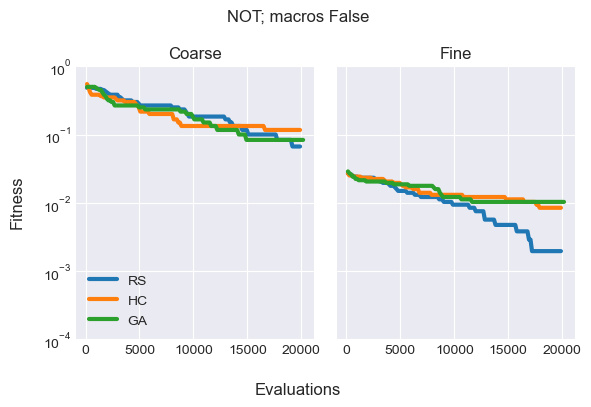

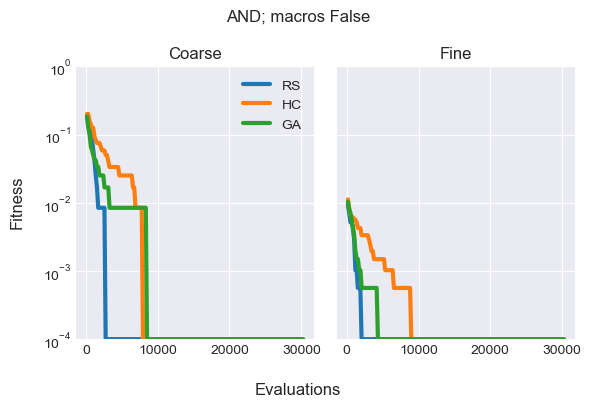

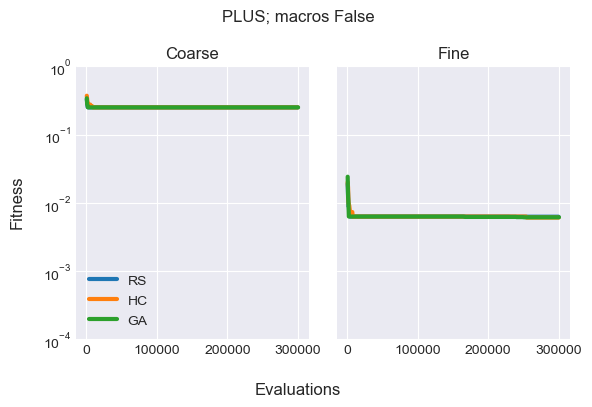

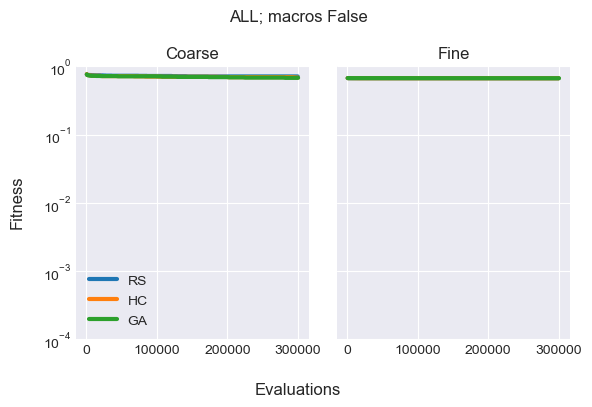

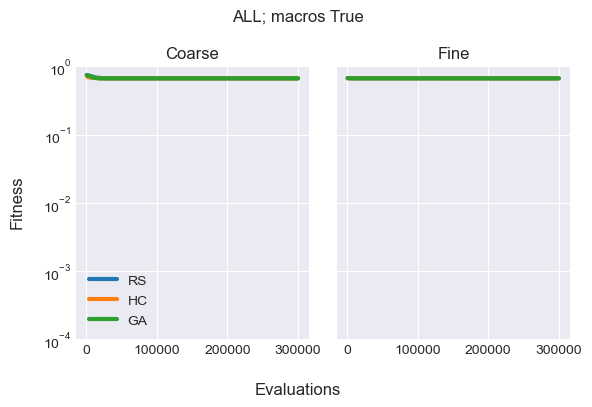

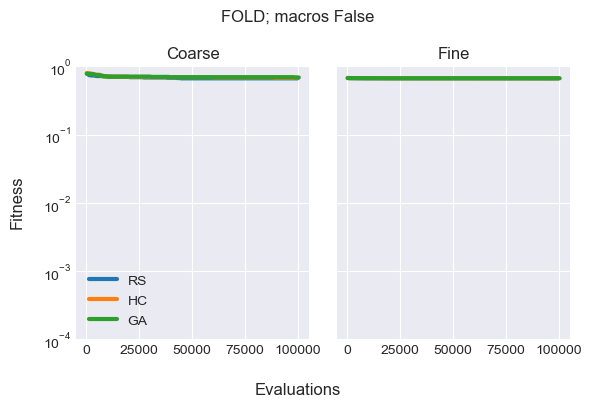

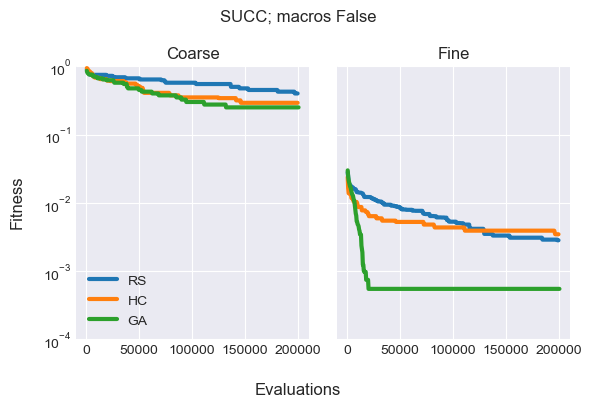

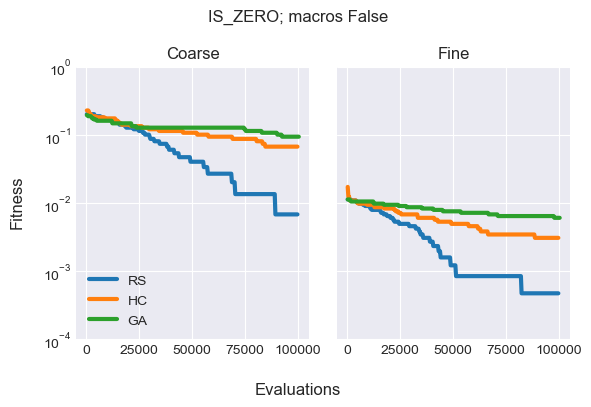

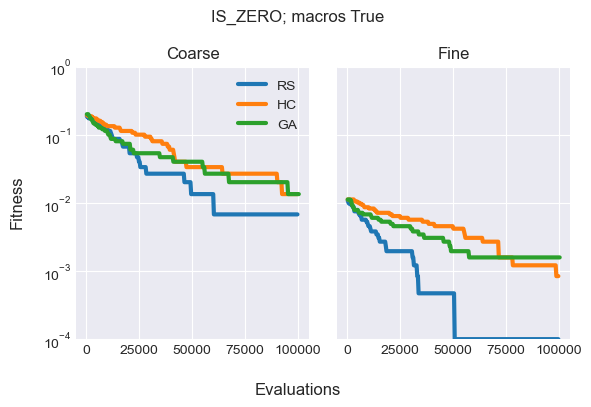

In [405]:

# Replace with your directory path
csv_directory = 'outputs_main/histories/'
first_zero_groups = make_generations_plots(csv_directory)

In [381]:
first_zero_groups

{('ALL', 'False', 'genetic_algorithm', 'discrete_metric'): [inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  106860,
  224680,
  3836,
  281672,
  173168,
  inf,
  128780,
  44388,
  202212,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf],
 ('PLUS', 'False', 'hill_climber', 'shd'): [inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  254354,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf],
 ('IS_ZERO', 'True', 'random_search', 'discrete_metric'): [17379,
  20539,
  12323,
  3159,
  5055,
  24015,
  25595,
  28439,
  3475,
  inf,
  6635,
  10427,
  631,
  12639,
  7583,
  12007,
  20539,
  16115,
  60355,
  11691,
  17063,
  4423,
  49611,
  315,
  24963,
  46451,
  6951,
  8847,
  1263,
  315],
 ('IS_ZERO', 'False', 'genetic_algorithm', 'discrete_metric'): [inf,
  inf,
  inf,
  3804,
  21556,
  75446,
  inf,
  74812,
  23775,
  inf,
  

In [389]:
def mean_of_finite_values(results):
    finite_mask = np.isfinite(results)
    finite_values = np.array(results)[finite_mask]
    
    if len(finite_values) == 0:
        return np.nan  # Return NaN if there are no finite values
    
    return np.mean(finite_values)

for problem in ['NOT', 'AND', 'SUCC', 'PLUS', 'IS_ZERO', 'ALL', 'FOLD']:
    for macros in 'False', 'True':
                
        tmp_k = (problem, macros, 'random_search', 'shd')

        if tmp_k not in first_zero_groups: continue

        # print(f'{k}: {n_zeros} {mean_first_zero_na}')
        print(f'{problem}{"-M" if macros == "True" else ""} & ', end='')
        for solver in 'genetic_algorithm', 'hill_climber', 'random_search':
            for metric in 'discrete_metric', 'shd':
                k = (problem, macros, solver, metric)
                n_zeros = np.sum(np.isfinite(first_zero_groups[k]))
                mean_first_zero_na = mean_of_finite_values(first_zero_groups[k])
                print(f'{mean_first_zero_na:.0f}', end=" & ")
        print("\\")

NOT & 5532 & 4955 & 4192 & 6566 & 7309 & 6999 & \
AND & 974 & 806 & 1804 & 1671 & 749 & 628 & \
SUCC & 50445 & 10165 & 49690 & 30984 & 100414 & 80236 & \
PLUS & nan & nan & nan & 254354 & nan & nan & \
IS_ZERO & 32710 & 36478 & 34032 & 31958 & 31337 & 25562 & \
IS_ZERO-M & 19326 & 18118 & 27378 & 34928 & 15821 & 12154 & \
ALL & 145700 & 123026 & 112225 & 96052 & 131826 & nan & \
ALL-M & 8604 & 6521 & 4430 & 12361 & 12361 & 10009 & \
FOLD & 13631 & 10620 & 25950 & 30109 & 20033 & 9574 & \


In [137]:
file_groups = process_csv_directory("outputs/histories/")

In [143]:
file_groups.keys()

dict_keys([('ALL', 'False', 'genetic_algorithm', 'discrete_metric'), ('PLUS', 'False', 'hill_climber', 'shd'), ('IS_ZERO', 'True', 'random_search', 'discrete_metric'), ('IS_ZERO', 'False', 'genetic_algorithm', 'discrete_metric'), ('PLUS', 'False', 'hill_climber', 'discrete_metric'), ('SUCC', 'False', 'hill_climber', 'discrete_metric'), ('ALL', 'False', 'hill_climber', 'shd'), ('ALL', 'True', 'random_search', 'shd'), ('AND', 'False', 'hill_climber', 'discrete_metric'), ('NOT', 'False', 'random_search', 'discrete_metric'), ('ALL', 'False', 'genetic_algorithm', 'shd'), ('IS_ZERO', 'True', 'genetic_algorithm', 'discrete_metric'), ('ALL', 'False', 'hill_climber', 'discrete_metric'), ('PLUS', 'False', 'genetic_algorithm', 'shd'), ('ALL', 'False', 'random_search', 'shd'), ('IS_ZERO', 'False', 'hill_climber', 'shd'), ('ALL', 'False', 'random_search', 'discrete_metric'), ('IS_ZERO', 'False', 'random_search', 'discrete_metric'), ('AND', 'False', 'genetic_algorithm', 'shd'), ('SUCC', 'False', 'ra

In [148]:
for k in file_groups:
    print(f"{k}: {len(file_groups[k])}")
    print(file_groups[k][0])


('ALL', 'False', 'genetic_algorithm', 'discrete_metric'): 30
{'problem': 'ALL', 'macros': 'False', 'solver': 'genetic_algorithm', 'metric': 'discrete_metric', 'repetition': '21', 'data':      evaluations       dummy  fitness
0            NaN  Unnamed: 0  fitness
1          548.0           0        1
2         1096.0           1        1
3         1644.0           2        1
4         2192.0           3        1
..           ...         ...      ...
544     298112.0         543        1
545     298660.0         544        1
546     299208.0         545        1
547     299756.0         546        1
548     300304.0         547        1

[549 rows x 3 columns]}
('PLUS', 'False', 'hill_climber', 'shd'): 30
{'problem': 'PLUS', 'macros': 'False', 'solver': 'hill_climber', 'metric': 'shd', 'repetition': '25', 'data':     evaluations             fitness
0    Unnamed: 0             fitness
1           546   0.037037037037037
2          1093  0.0061728395061728
3          1640  0.00617283950617